<a href="https://colab.research.google.com/github/abhijeetraj22/TSF-GRIP_Tasks/blob/main/TSF_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## THE Spark Foundation -GRIP - Data Science and Business Analytics - August'2021

## Task - 7: Stock Market Prediction using Numerical and Textual Analysis

##### In this task,
- Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines 
- Stock to analyze and predict - SENSEX (S&P BSE SENSEX)

### Author: Zahid Equbal Akhtar




## **Stock Price Data | Stock News Headlines Data**
 - Step 1 - Importing the Library
 - Step 2 - Importing the Dataset
 - Step 3 - Feature Engineering
 - Step 4 - Finalising Stock Data andwriting to Disk
 - Step 5 - Reading Stock Data
 - Step 6 - Feature Engineering of Stock Data
 - Step 7 - EDA off Stock Data
 - Step 8 - Data preparation for Modelling
 - Step 9 - Setting the Target Variable and the Feature Dataset
 - Step 10 - Stock Data Modelling Saving the Model to disk
 - Step 11 - Predictions
 - Step 12 - Model Evaluation
 - Step 13 - Plotting the Predictions against unseen data

In [47]:
#!pip install yfinance --upgrade --no-cache-dir

 ## STEP 1 -Importing the Library

In [ ]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation

import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler

import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
nltk.download('vader_lexicon')

## STEP 2 - Importing the Dataset

In [54]:
# reading the datasets into pandas
import yfinance as yf
stock_price = yf.download('^BSESN', start='2015-01-01', end='2021-01-01')
stock_headlines = pd.read_csv('C:/Users/Zahid/TheSparkFoundation/india-news-headlines.csv')

[*********************100%***********************]  1 of 1 completed


In [55]:
# displaying stock price dataset
stock_price.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [56]:
stock_price.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-24,46743.488281,47053.398438,46539.019531,46973.539062,46973.539062,13700
2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,47353.750000,9600
2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,47613.078125,12800
2020-12-30,47789.031250,47807.851562,47358.359375,47746.218750,47746.218750,15600
2020-12-31,47753.109375,47896.968750,47602.121094,47751.328125,47751.328125,13900


In [57]:
# displaying stock news headlines dataset
stock_headlines.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [58]:
stock_headlines.tail()

,publish_date,headline_category,headline_text
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


## STEP 3 - Feature Engineering

In [59]:
# displaying number of records in both stock_price and stock_headlines datasets
len(stock_price), len(stock_headlines)

(1474, 3424067)

In [60]:
# checking for null values in both the datasets
stock_price.isna().any(), stock_headlines.isna().any()

(Open         False
 High         False
 Low          False
 Close        False
 Adj Close    False
 Volume       False
 dtype: bool, publish_date         False
 headline_category    False
 headline_text        False
 dtype: bool)

### **Stock Price Data**

In [61]:
# dropping duplicates
stock_price = stock_price.drop_duplicates()

# coverting the datatype of column 'Date' from type object to type 'datetime'
stock_price.reset_index(inplace=True)
stock_price['Date'] = pd.to_datetime(stock_price['Date'],format='%Y-%m-%d')

# filtering the important columns required
stock_price = stock_price.filter(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'])

# setting column 'Date' as the index column
stock_price.set_index('Date', inplace= True)

# sorting the data according to the index i.e 'Date'
stock_price = stock_price.sort_index(ascending=True, axis=0)
stock_price

,Close,Open,High,Low,Volume
Date,,,,,
2015-01-02,27887.900391,27521.279297,27937.470703,27519.259766,7400
2015-01-05,27842.320312,27978.429688,28064.490234,27786.849609,9200
2015-01-06,26987.460938,27694.230469,27698.929688,26937.060547,14100
2015-01-07,26908.820312,26983.429688,27051.599609,26776.119141,12200
2015-01-08,27274.710938,27178.769531,27316.410156,27101.939453,8200
...,...,...,...,...,...
2020-12-24,46973.539062,46743.488281,47053.398438,46539.019531,13700
2020-12-28,47353.750000,47153.589844,47406.718750,47148.238281,9600
2020-12-29,47613.078125,47466.621094,47714.550781,47361.898438,12800


### **Stock News Headlines Data**

In [62]:
# dropping duplicates
stock_headlines = stock_headlines.drop_duplicates()

# coverting the datatype of column 'Date' from type string to type 'datetime'
stock_headlines['publish_date'] = stock_headlines['publish_date'].astype(str)
stock_headlines['publish_date'] = stock_headlines['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
stock_headlines['publish_date'] = pd.to_datetime(stock_headlines['publish_date']).dt.normalize()

# filtering the important columns required
stock_headlines = stock_headlines.filter(['publish_date', 'headline_text'])

# grouping the news headlines according to 'Date'
stock_headlines = stock_headlines.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

# setting column 'Date' as the index column
stock_headlines.set_index('publish_date', inplace= True)

# sorting the data according to the index i.e 'Date'
stock_headlines = stock_headlines.sort_index(ascending=True, axis=0)
stock_headlines

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...
...,...
2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
2020-12-28,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,Man recovers charred remains of 'thief' from h...


### **Combined Stock Data**

In [63]:
# concatenating the datasets stock_price and stock_headlines
stock_data = pd.concat([stock_price, stock_headlines], axis=1)

# dropping the null values if any
stock_data.dropna(axis=0, inplace=True)

# displaying the combined stock_data
stock_data

,Close,Open,High,Low,Volume,headline_text
2015-01-02,27887.900391,27521.279297,27937.470703,27519.259766,7400.0,"Drink smart with these party tips,How to say s..."
2015-01-05,27842.320312,27978.429688,28064.490234,27786.849609,9200.0,"Recipe: Strawberry cupcakes,Recipe: Kaju jeera..."
2015-01-06,26987.460938,27694.230469,27698.929688,26937.060547,14100.0,"Turn to gardening for happiness,Teeth jeweller..."
2015-01-07,26908.820312,26983.429688,27051.599609,26776.119141,12200.0,"Can ex-lovers be friends?,Is water diet bad fo..."
2015-01-08,27274.710938,27178.769531,27316.410156,27101.939453,8200.0,"How to do a home manicure,Recipe: Spiced beetr..."
...,...,...,...,...,...,...
2020-12-24,46973.539062,46743.488281,47053.398438,46539.019531,13700.0,How to set the mood for sex during cold winter...
2020-12-28,47353.750000,47153.589844,47406.718750,47148.238281,9600.0,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,47613.078125,47466.621094,47714.550781,47361.898438,12800.0,Man recovers charred remains of 'thief' from h...
2020-12-30,47746.218750,47789.031250,47807.851562,47358.359375,15600.0,Numerology Readings 30 December 2020: Predicti...


### **Calculating Sentiment Scores**

In [64]:
# adding empty sentiment columns to stock_data for later calculation
stock_data['compound'] = ''
stock_data['negative'] = ''
stock_data['neutral'] = ''
stock_data['positive'] = ''
stock_data.head()

,Close,Open,High,Low,Volume,headline_text,compound,negative,neutral,positive
2015-01-02,27887.900391,27521.279297,27937.470703,27519.259766,7400.0,"Drink smart with these party tips,How to say s...",,,,
2015-01-05,27842.320312,27978.429688,28064.490234,27786.849609,9200.0,"Recipe: Strawberry cupcakes,Recipe: Kaju jeera...",,,,
2015-01-06,26987.460938,27694.230469,27698.929688,26937.060547,14100.0,"Turn to gardening for happiness,Teeth jeweller...",,,,
2015-01-07,26908.820312,26983.429688,27051.599609,26776.119141,12200.0,"Can ex-lovers be friends?,Is water diet bad fo...",,,,
2015-01-08,27274.710938,27178.769531,27316.410156,27101.939453,8200.0,"How to do a home manicure,Recipe: Spiced beetr...",,,,


In [13]:
# importing requires libraries to analyze the sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

# instantiating the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
stock_data['compound'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
stock_data['negative'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neg'])
stock_data['neutral'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neu'])
stock_data['positive'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['pos'])

# displaying the stock data
stock_data.head()

,Close,Open,High,Low,Volume,headline_text,compound,negative,neutral,positive
2015-01-02,27887.900391,27521.279297,27937.470703,27519.259766,7400.0,"Drink smart with these party tips,How to say s...",-0.9995,0.130,0.767,0.102
2015-01-05,27842.320312,27978.429688,28064.490234,27786.849609,9200.0,"Recipe: Strawberry cupcakes,Recipe: Kaju jeera...",-0.9972,0.117,0.776,0.107
2015-01-06,26987.460938,27694.230469,27698.929688,26937.060547,14100.0,"Turn to gardening for happiness,Teeth jeweller...",-0.9994,0.097,0.838,0.065
2015-01-07,26908.820312,26983.429688,27051.599609,26776.119141,12200.0,"Can ex-lovers be friends?,Is water diet bad fo...",-0.9999,0.146,0.775,0.079
2015-01-08,27274.710938,27178.769531,27316.410156,27101.939453,8200.0,"How to do a home manicure,Recipe: Spiced beetr...",-0.9999,0.131,0.803,0.066


## STEP 4 - Finalising Stock Data and saving to disk

In [14]:
# dropping the 'headline_text' which is unwanted now
stock_data.drop(['headline_text'], inplace=True, axis=1)

# rearranging the columns of the whole stock_data
stock_data = stock_data[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume']]

# displaying the final stock_data
stock_data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
2015-01-02,27887.900391,-0.9995,0.130,0.767,0.102,27521.279297,27937.470703,27519.259766,7400.0
2015-01-05,27842.320312,-0.9972,0.117,0.776,0.107,27978.429688,28064.490234,27786.849609,9200.0
2015-01-06,26987.460938,-0.9994,0.097,0.838,0.065,27694.230469,27698.929688,26937.060547,14100.0
2015-01-07,26908.820312,-0.9999,0.146,0.775,0.079,26983.429688,27051.599609,26776.119141,12200.0
2015-01-08,27274.710938,-0.9999,0.131,0.803,0.066,27178.769531,27316.410156,27101.939453,8200.0


In [15]:
# writing the prepared stock_data to disk
stock_data.to_csv('stock_data3.csv')

## STEP 5 - Reading Stock Data 

In [65]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('stock_data3.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-02,27887.900391,-0.9995,0.130,0.767,0.102,27521.279297,27937.470703,27519.259766,7400.0
2015-01-05,27842.320312,-0.9972,0.117,0.776,0.107,27978.429688,28064.490234,27786.849609,9200.0
2015-01-06,26987.460938,-0.9994,0.097,0.838,0.065,27694.230469,27698.929688,26937.060547,14100.0
2015-01-07,26908.820312,-0.9999,0.146,0.775,0.079,26983.429688,27051.599609,26776.119141,12200.0
2015-01-08,27274.710938,-0.9999,0.131,0.803,0.066,27178.769531,27316.410156,27101.939453,8200.0


## STEP 6 - Feature Engineering of Stock Data

In [66]:
# displaying the shape i.e. number of rows and columns of stock_data
stock_data.shape

(1474, 9)

In [67]:
# checking for null values
stock_data.isna().any()

Close       False
compound    False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [19]:
# displaying stock_data statistics
stock_data.describe(include='all')

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1.474000e+03
mean,32720.969157,-0.954978,0.130770,0.782714,0.086542,32766.649284,32920.704153,32533.969631,2.302398e+05
std,5378.409081,0.289147,0.017608,0.022728,0.014158,5383.317285,5396.588432,5352.094624,1.941555e+06
min,22951.830078,-1.000000,0.068000,0.730000,0.044000,23060.390625,23142.960938,22494.609375,2.500000e+03
25%,27877.024414,-0.999900,0.120000,0.766250,0.077000,27886.702148,28029.185547,27717.564453,1.020000e+04
50%,32602.259766,-0.999800,0.131000,0.779000,0.086000,32630.419922,32776.445312,32453.839844,1.340000e+04
75%,37120.468750,-0.999600,0.142000,0.796000,0.095750,37230.690430,37411.762695,36908.123047,1.850000e+04
max,47751.328125,0.999900,0.199000,0.869000,0.158000,47789.031250,47896.968750,47602.121094,3.181510e+07


In [20]:
# displaying stock_data information
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1474 entries, 2015-01-02 to 2020-12-31
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1474 non-null   float64
 1   compound  1474 non-null   float64
 2   negative  1474 non-null   float64
 3   neutral   1474 non-null   float64
 4   positive  1474 non-null   float64
 5   Open      1474 non-null   float64
 6   High      1474 non-null   float64
 7   Low       1474 non-null   float64
 8   Volume    1474 non-null   float64
dtypes: float64(9)
memory usage: 115.2+ KB


## STEP 7 - EDA of Stock Data

Text(0, 0.5, 'Close Price (INR)')

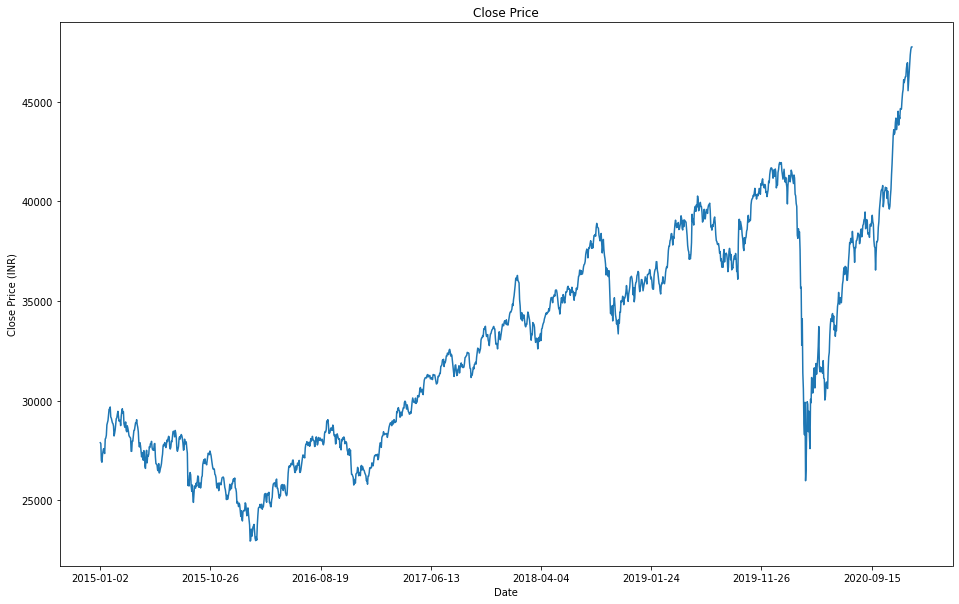

In [68]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting close price
stock_data['Close'].plot()

# setting plot title, x and y labels
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')

In [22]:
# calculating 7 day rolling mean
stock_data.rolling(7).mean().head(20)

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-12,27420.694754,-0.714000,0.122429,0.788429,0.089143,27469.169643,27599.604353,27223.514230,9957.142857
2015-01-13,27354.670480,-0.713957,0.121429,0.789143,0.089571,27482.066964,27561.421317,27195.702846,10014.285714
2015-01-14,27283.884766,-0.714300,0.122857,0.788429,0.088857,27404.025670,27482.608538,27112.331473,10157.142857


<AxesSubplot:xlabel='Date'>

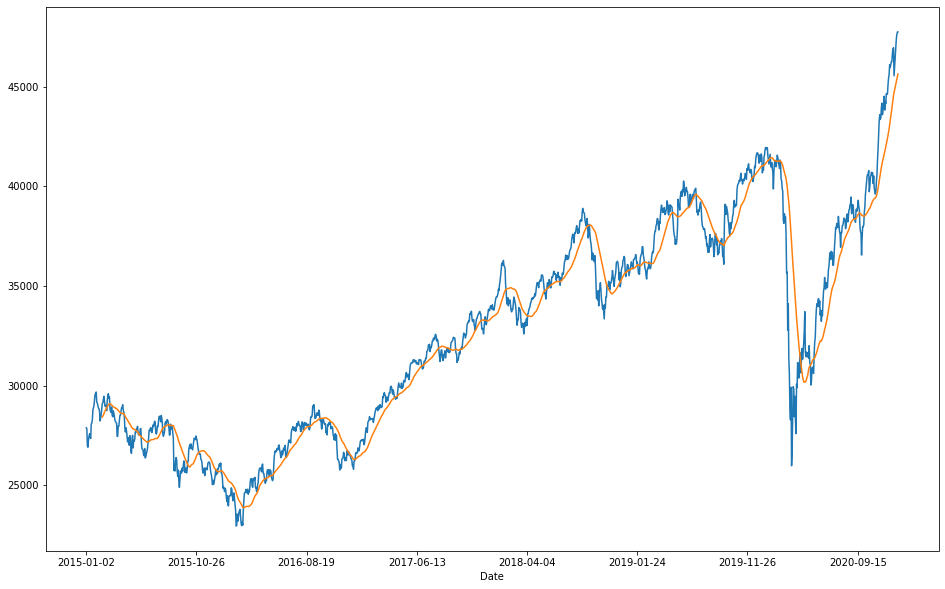

In [23]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting the close price and a 30-day rolling mean of close price
stock_data['Close'].plot()
stock_data.rolling(window=30).mean()['Close'].plot()

In [24]:
# displaying stock_data
stock_data

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-02,27887.900391,-0.9995,0.130,0.767,0.102,27521.279297,27937.470703,27519.259766,7400.0
2015-01-05,27842.320312,-0.9972,0.117,0.776,0.107,27978.429688,28064.490234,27786.849609,9200.0
2015-01-06,26987.460938,-0.9994,0.097,0.838,0.065,27694.230469,27698.929688,26937.060547,14100.0
2015-01-07,26908.820312,-0.9999,0.146,0.775,0.079,26983.429688,27051.599609,26776.119141,12200.0
2015-01-08,27274.710938,-0.9999,0.131,0.803,0.066,27178.769531,27316.410156,27101.939453,8200.0
...,...,...,...,...,...,...,...,...,...
2020-12-24,46973.539062,-0.9966,0.080,0.857,0.063,46743.488281,47053.398438,46539.019531,13700.0
2020-12-28,47353.750000,-0.9997,0.125,0.792,0.083,47153.589844,47406.718750,47148.238281,9600.0
2020-12-29,47613.078125,-0.9997,0.134,0.777,0.089,47466.621094,47714.550781,47361.898438,12800.0


## STEP 8 - Data Preparation for Modelling

In [25]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 1178
Number of records in Test Data: 296


In [26]:
# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close
compound = stock_data.iloc[start:total_data,1] #compound
negative = stock_data.iloc[start:total_data,2] #neg
neutral = stock_data.iloc[start:total_data,3] #neu
positive = stock_data.iloc[start:total_data,4] #pos
open_price = stock_data.iloc[start:total_data,5] #open
high = stock_data.iloc[start:total_data,6] #high
low = stock_data.iloc[start:total_data,7] #low
volume = stock_data.iloc[start:total_data,8] #volume

# printing close price
print("Close Price:")
close_price

Close Price:


Date
2015-01-05    27842.320312
2015-01-06    26987.460938
2015-01-07    26908.820312
2015-01-08    27274.710938
2015-01-09    27458.380859
                  ...     
2020-12-24    46973.539062
2020-12-28    47353.750000
2020-12-29    47613.078125
2020-12-30    47746.218750
2020-12-31    47751.328125
Name: Close, Length: 1473, dtype: float64

In [27]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# shifting next day compound
compound_shifted = compound.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted','volume', 'open_price', 'high', 'low']

# dropping nulls
data = data.dropna()    
data.head(10)

,close_price,close_price_shifted,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,,
2015-01-05,27842.320312,26987.460938,-0.9972,-0.9994,9200.0,27978.429688,28064.490234,27786.849609
2015-01-06,26987.460938,26908.820312,-0.9994,-0.9999,14100.0,27694.230469,27698.929688,26937.060547
2015-01-07,26908.820312,27274.710938,-0.9999,-0.9999,12200.0,26983.429688,27051.599609,26776.119141
2015-01-08,27274.710938,27458.380859,-0.9999,-0.9998,8200.0,27178.769531,27316.410156,27101.939453
2015-01-09,27458.380859,27585.269531,-0.9998,0.9977,11100.0,27404.189453,27507.669922,27119.630859
2015-01-12,27585.269531,27425.730469,0.9977,-0.9992,7500.0,27523.859375,27620.660156,27323.740234
2015-01-13,27425.730469,27346.820312,-0.9992,-0.9996,7800.0,27611.560547,27670.189453,27324.580078
2015-01-14,27346.820312,28075.550781,-0.9996,-0.9994,10200.0,27432.140625,27512.800781,27203.250000
2015-01-15,28075.550781,28121.890625,-0.9994,-0.9994,16700.0,27831.160156,28194.609375,27703.699219


## STEP 9 - Setting the Target Variable and the Feature Dataset

In [28]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2015-01-05    26987.460938
2015-01-06    26908.820312
2015-01-07    27274.710938
2015-01-08    27458.380859
2015-01-09    27585.269531
                  ...     
2020-12-23    46973.539062
2020-12-24    47353.750000
2020-12-28    47613.078125
2020-12-29    47746.218750
2020-12-30    47751.328125
Name: close_price_shifted, Length: 1472, dtype: float64

In [30]:
# setting the features dataset for prediction  
cols = ['close_price', 'compound', 'compound_shifted', 'volume', 'open_price', 'high', 'low']
x = data[cols]
x

,close_price,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,
2015-01-05,27842.320312,-0.9972,-0.9994,9200.0,27978.429688,28064.490234,27786.849609
2015-01-06,26987.460938,-0.9994,-0.9999,14100.0,27694.230469,27698.929688,26937.060547
2015-01-07,26908.820312,-0.9999,-0.9999,12200.0,26983.429688,27051.599609,26776.119141
2015-01-08,27274.710938,-0.9999,-0.9998,8200.0,27178.769531,27316.410156,27101.939453
2015-01-09,27458.380859,-0.9998,0.9977,11100.0,27404.189453,27507.669922,27119.630859
...,...,...,...,...,...,...,...
2020-12-23,46444.179688,-0.9995,-0.9966,10500.0,46072.300781,46513.320312,45899.101562
2020-12-24,46973.539062,-0.9966,-0.9997,13700.0,46743.488281,47053.398438,46539.019531
2020-12-28,47353.750000,-0.9997,-0.9997,9600.0,47153.589844,47406.718750,47148.238281


### **Scaling the Target Variable and the Feature Dataset**
Since we are using LSTM to predict stock prices, which is a time series data, it is important to understand that LSTM can be very sensitive to the scale of the data. Right now, if the data is observed, it is present in different scales. Therefore, it is important to re-scale the data so that the range of the dataset is same, for almost all records. Here a feature range of (-1,1) is used.

In [31]:
# scaling the feature dataset
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# displaying the scaled feature dataset and the target variable
x, y

(array([[-0.60551637, -0.99719986, -0.99939997, ..., -0.60223943,
         -0.60092835, -0.5743613 ],
        [-0.67447224, -0.99939997, -0.99989999, ..., -0.62522486,
         -0.63057053, -0.64270724],
        [-0.68081566, -0.99989999, -0.99989999, ..., -0.68271292,
         -0.68306053, -0.65565127],
        ...,
        [ 0.96834213, -0.99969998, -0.99969998, ...,  0.94860685,
          0.96747338,  0.98281597],
        [ 0.98926042, -0.99969998, -0.99969998, ...,  0.97392415,
          0.99243453,  1.        ],
        [ 1.        , -0.99969998, -0.99959998, ...,  1.        ,
          1.        ,  0.99971536]]), array([[-0.67453931],
        [-0.68088143],
        [-0.65137352],
        ...,
        [ 0.98885058],
        [ 0.99958795],
        [ 1.        ]]))

### **Dividing the dataset into Training and Test**
Normally for any other dataset train_test_split from sklearn package is used, but for time series data like stock prices which is dependent on date, the dataset is divided into train and test dataset in a different way as shown below. In timeseries data, an observation for a particular date is always dependent on the previous date records.

In [34]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (1178, 7) and y: (1178, 1)
Number of rows and columns in the Test set X: (293, 7) and y: (293, 1)


### **Reshaping the Feature Dataset**

In [35]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (1178, 7, 1)
Shape of Test set X: (293, 7, 1)


## STEP 10 - Stock Data Modelling

In [36]:
# setting the seed to achieve consistent predictions at each execution
np.random.seed(2020)

# setting the model architecture
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(cols),1)))
model.add(Dropout(0.3))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.3))
model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 100)            40800     
_________________________________________________________________
dropout (Dropout)            (None, 7, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 100)            80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [37]:
# compiling the model
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=8, verbose=1)

Epoch 1/10
118/118 [==============================] - 8s 21ms/step - loss: 0.0979 - val_loss: 0.0436
Epoch 2/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0320 - val_loss: 0.0543
Epoch 3/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0189 - val_loss: 0.0119
Epoch 4/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0064 - val_loss: 0.0035
Epoch 5/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0054 - val_loss: 0.0032
Epoch 6/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0045 - val_loss: 0.0030
Epoch 7/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 8/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0033 - val_loss: 0.0028
Epoch 9/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 10/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0036 - val_loss: 0.00

### **Saving the Model to disk**

In [38]:
# saving the model as a json file
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights('model3.h5')
print('Model is saved to the disk')

Model is saved to the disk


## STEP 11 - Predictions

In [39]:
# performing predictions
predictions = model.predict(X_test) 

# unscaling the predictions
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

# printing the predictions
print('Predictions:')
predictions[0:5]

Predictions:


array([[38677.   ],
       [39166.746],
       [39676.695],
       [39905.258],
       [39836.34 ]], dtype=float32)

## STEP 12 - Model Evaluation

In [40]:
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

293/293 [==============================] - 1s 2ms/step - loss: 0.0033
Train Loss = 0.0014
Test Loss = 0.0033


In [46]:
# calculating root mean squared error using sklearn.metrics package
rmse = metrics.mean_squared_error(y_test, predictions)
print('Root Mean Square Error (sklearn.metrics) =', round(np.sqrt(rmse),4))

Root Mean Square Error = 47.6645


## STEP 13 - Plotting the Predictions against unseen data

In [43]:
# unscaling the test feature dataset, x_test
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

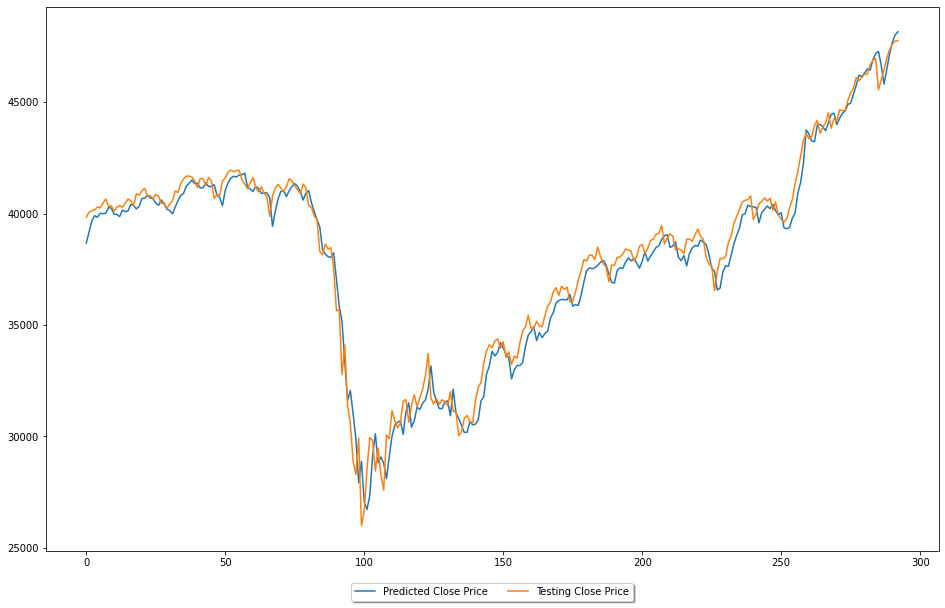

In [44]:
# plotting
plt.figure(figsize=(16,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()

In [51]:
print(" We can clearly see from the above plot that the hybrid model has performed good ")

 We can clearly see from the above plot that the hybrid model has performed good 


# That's it Folks!